# USGS Historical Earthquake Events
I'm querying the US Geological Service Common Catalog (ComCat) through their API [here](https://github.com/usgs/libcomcat).  It works with bounding boxes, not particular countries, so ran three different downloads for bounding boxes around the Lower 48 states, Alaska, and Hawaii.  I'll combine them into a single dataframe, and then filter them by county.

In [51]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

# API Queries

In [2]:
## Query generator

# Lower 48 USA
lon = (-125.0011,-66.9326)
lat = (24.9493, 49.5904)
start = '1996-01-01'
end = '2019-01-01'
name = 'lower48.csv'

minmag = 4
maxmag = 9.9

# Remove '-x' to download results, leave it there to get record count.

print(f'getcsv {name} -b {lon[0]} {lon[1]} {lat[0]} {lat[1]} -s {start} -e {end} -f csv -x -m {minmag} {maxmag}')

getcsv lower48.csv -b -125.0011 -66.9326 24.9493 49.5904 -s 1996-01-01 -e 2019-01-01 -f csv -x -m 4 9.9


In [3]:
## Query generator

# Alaska
lon = (-179.1505,-129.9795)
lat = (51.2097, 71.4410)
start = '1996-01-01'
end = '2019-01-01'
name = 'alaska.csv'

minmag = 4
maxmag = 9.9

# Remove '-x' to download results, leave it there to get record count.

print(f'getcsv {name} -b {lon[0]} {lon[1]} {lat[0]} {lat[1]} -s {start} -e {end} -f csv -x -m {minmag} {maxmag}')

getcsv alaska.csv -b -179.1505 -129.9795 51.2097 71.441 -s 1996-01-01 -e 2019-01-01 -f csv -x -m 4 9.9


In [4]:
## Query generator

# Hawaii
lon = (-160.2471,-154.8066)
lat = (18.9117, 22.2356)
start = '1996-01-01'
end = '2019-01-01'
name = 'hawaii.csv'

minmag = 4
maxmag = 9.9

# Remove '-x' to download results, leave it there to get record count.

print(f'getcsv {name} -b {lon[0]} {lon[1]} {lat[0]} {lat[1]} -s {start} -e {end} -f csv -x -m {minmag} {maxmag}')

getcsv hawaii.csv -b -160.2471 -154.8066 18.9117 22.2356 -s 1996-01-01 -e 2019-01-01 -f csv -x -m 4 9.9


## Combinining datasets

In [5]:
lower48 = pd.read_csv('../data_input/5_USGS_quakes/lower48.csv')
alaska = pd.read_csv('../data_input/5_USGS_quakes/alaska.csv')
hawaii = pd.read_csv('../data_input/5_USGS_quakes/hawaii.csv')


print(lower48.shape, alaska.shape, hawaii.shape)
quakes = pd.concat([lower48, alaska, hawaii], ignore_index=True)
print(quakes.shape)
quakes.head(2)

(1980, 8) (6834, 8) (158, 8)
(8972, 8)


,id,time,location,latitude,longitude,depth,magnitude,url
0,ci3248846,1996-01-07 14:32:53.020,"16km N of Ridgecrest, California",35.761,-117.646,3.236,5.17,https://earthquake.usgs.gov/earthquakes/eventp...
1,ci3249165,1996-01-08 08:57:11.000,"16km NNE of Ridgecrest, California",35.755,-117.620,1.170,4.16,https://earthquake.usgs.gov/earthquakes/eventp...


# Map to counties

In [6]:
# Import a shape file with all the counties in the US.
# Note how it doesn't include all the same territories as the 
# quake contour map.
counties = geopandas.read_file('../data_input/1_USCounties/')

# Turn state codes from strings to integers
for col in ['STATE_FIPS', 'CNTY_FIPS', 'FIPS']:
    counties[col] = counties[col].astype(int)

In [15]:
print(counties.shape)
counties.head()

(3141, 6)


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
0,Lake of the Woods,Minnesota,27,77,27077,"POLYGON ((-95.34283127277658 48.546679319076, ..."
1,Ferry,Washington,53,19,53019,POLYGON ((-118.8516288013387 47.94956368481996...
2,Stevens,Washington,53,65,53065,"POLYGON ((-117.438831576286 48.04411548512263,..."
3,Okanogan,Washington,53,47,53047,"POLYGON ((-118.972093862835 47.93915200536639,..."
4,Pend Oreille,Washington,53,51,53051,POLYGON ((-117.4385804303028 48.99991850672649...


In [12]:
print(quakes_coords.shape)
quakes_coords.head(2)

(8972, 9)


,id,time,location,latitude,longitude,depth,magnitude,url,geometry
0,ci3248846,1996-01-07 14:32:53.020,"16km N of Ridgecrest, California",35.761,-117.646,3.236,5.17,https://earthquake.usgs.gov/earthquakes/eventp...,POINT (-117.646 35.761)
1,ci3249165,1996-01-08 08:57:11.000,"16km NNE of Ridgecrest, California",35.755,-117.620,1.170,4.16,https://earthquake.usgs.gov/earthquakes/eventp...,POINT (-117.62 35.755)


In [43]:
# Create geoDF of all the points 
quakes_coords = geopandas.GeoDataFrame(
    quakes, geometry=geopandas.points_from_xy(quakes.longitude, quakes.latitude))

# Mark those points with their respective counties, keeping the point coordinates
quakes_county = geopandas.sjoin(quakes_coords, counties, how='left', op='within').dropna()

In [68]:
print(quakes_county.shape)
quakes_county.head(2)

(2547, 16)


,id,time,location,latitude,longitude,depth,magnitude,url,geometry,index_right,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,year
0,ci3248846,1996-01-07 14:32:53.020,"16km N of Ridgecrest, California",35.761,-117.646,3.236,5.17,https://earthquake.usgs.gov/earthquakes/eventp...,POINT (-117.646 35.761),1985.0,Kern,California,6.0,29.0,6029,1996
1,ci3249165,1996-01-08 08:57:11.000,"16km NNE of Ridgecrest, California",35.755,-117.620,1.170,4.16,https://earthquake.usgs.gov/earthquakes/eventp...,POINT (-117.62 35.755),1986.0,San Bernardino,California,6.0,71.0,6071,1996


In [69]:
# Make FIPS codes back into integers
quakes_county['FIPS'] = quakes_county['FIPS'].astype(int)

# Extract year as its own column
quakes_county['year'] = [t.year for t in pd.to_datetime(quakes_county['time'])]

# Trim unnecessary columns
quakes_county = quakes_county[['FIPS','year','magnitude','geometry']]

In [70]:
print(quakes_county.shape)
quakes_county.head(2)

(2547, 4)


,FIPS,year,magnitude,geometry
0,6029,1996,5.17,POINT (-117.646 35.761)
1,6071,1996,4.16,POINT (-117.62 35.755)


# Plots

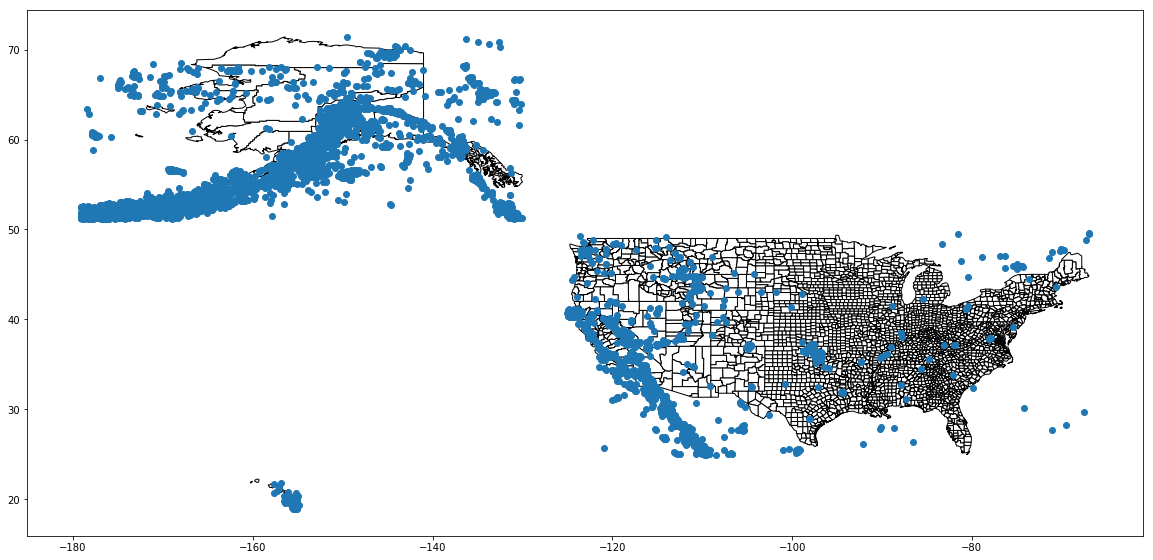

In [56]:
# These are all the earthquakes in the bounding boxes for the lower 48, Alaska, and Hawaii
fig, ax = plt.subplots(figsize=(20,20))
counties.plot(ax=ax, color='white', edgecolor='black');
quakes_coords.plot(ax=ax, marker='o')
plt.show()

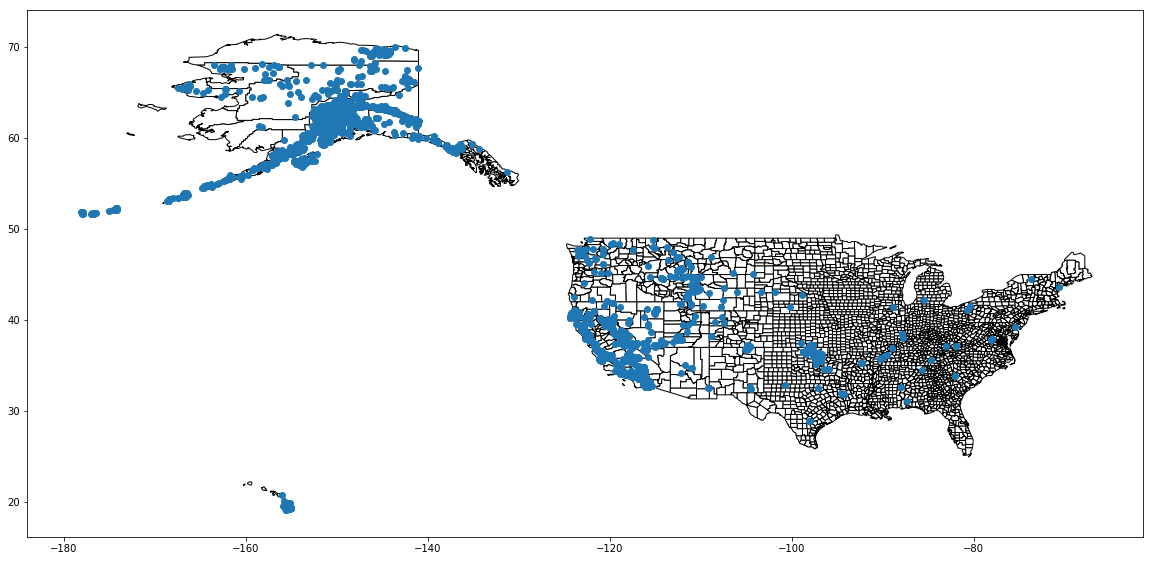

In [71]:
#And the same, but trimmed to only show the earthquakes that happened within the county boundaries.
fig, ax = plt.subplots(figsize=(20,20))
counties.plot(ax=ax, color='white', edgecolor='black');
quakes_county.plot(ax=ax, marker='o')
plt.show()

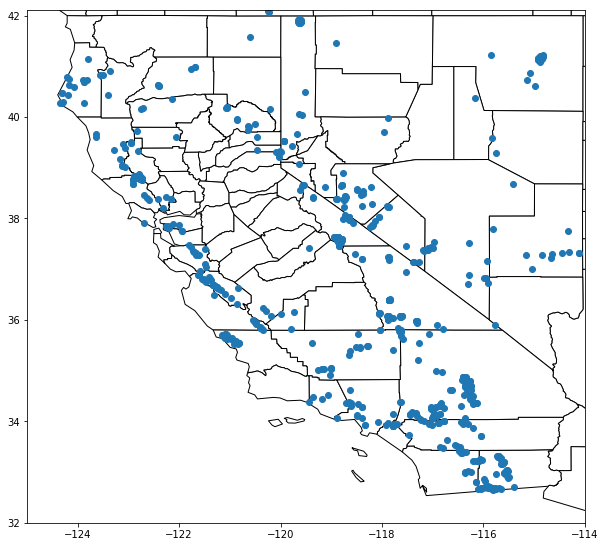

In [75]:
# And just California
fig, ax = plt.subplots(figsize=(10,10))
counties.plot(ax=ax, color='white', edgecolor='black');
quakes_county.plot(ax=ax, marker='o')
ax.set_xlim(-125,-114)
ax.set_ylim(32,42.1)
plt.show()

In [76]:
# Write to shape file
quakes_county.to_file("../data_output/5_USGS_quakes/quakes1.shp")